<a href="https://colab.research.google.com/github/abhidp55/Fraudulent-Transaction-Detection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Jupyter Notebook is a comprehensive analysis of the dataset 'transactions.txt' and application of machine learning models for the task of boolean binary classification (isFraud)

The objective is to develop a predictive machine learning model to classify new datapoints as fraudulent or not

# Loading The Dataset into a Pandas DataFrame 

In [1]:
# transactions.zip is a repo in Google Drive
# This cell mounts GDrive onto this Jupyter Notebook

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/Git_ML/internship/transactions.zip"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Git_ML/internship/transactions.zip
replace transactions.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading the dataset

df = pd.read_json('transactions.txt', lines=True)

# Looking at the dataset and making some decisions before proceeding to exploratory data analysis

In [5]:
# Observing values of the first 10 rows (always a good idea to manually look at the data first)

df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
accountNumber,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
customerId,737265056,737265056,737265056,737265056,830329091,830329091,830329091,830329091,830329091,830329091
creditLimit,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
availableMoney,5000,5000,5000,5000,5000,5000,5000,5000,4990.63,5000
transactionDateTime,2016-08-13T14:27:32,2016-10-11T05:05:54,2016-11-08T09:18:39,2016-12-10T02:14:50,2016-03-24T21:04:46,2016-04-19T16:24:27,2016-05-21T14:50:35,2016-06-03T00:31:21,2016-06-10T01:21:46,2016-07-11T10:47:16
transactionAmount,98.55,74.51,7.47,7.47,71.18,30.76,57.28,9.37,523.67,164.37
merchantName,Uber,AMC #191138,Play Store,Play Store,Tim Hortons #947751,In-N-Out #422833,Krispy Kreme #685312,Shake Shack #968081,Burger King #486122,Five Guys #510989
acqCountry,US,US,US,US,US,US,US,US,,US
merchantCountryCode,US,US,US,US,US,US,US,US,US,US
posEntryMode,02,09,09,09,02,02,02,05,02,05


It looks like some of the columns are blank, and there's a collection of various datatypes:
String, float, datetime, categorical, int, boolean, object

In [6]:
# Useful to check out the datatypes for each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
# Useful to check out the number of Null values for each feature

df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [8]:
# Useful to check out the distribution of all the continuous valued featured of the dataset

df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [9]:
# Total number of records and features

print("Number of records: {}, number of fields: {}\n".format(df.shape[0], df.shape[1]))

Number of records: 786363, number of fields: 29



In [10]:
# Distributions of the categories of the various categorical features

print('acqCountry: \n', df['acqCountry'].value_counts())
print('\n')
print('merchantCountryCode:\n', df['merchantCountryCode'].value_counts())
print('\n')
print('cardPresent:\n', df['cardPresent'].value_counts())
print('\n')
print('creditLimit:\n', df['creditLimit'].unique())
print('\n')
print('expirationDateKeyInMatch:\n', df['expirationDateKeyInMatch'].value_counts())
print('\n')
print('merchantCategoryCode:', df['merchantCategoryCode'].unique())
print('\n')
print('transactionType:\n', df['transactionType'].value_counts())
print('\n')
print('posEntryMode:', df['posEntryMode'].unique())
print('\n')
print('posConditionCode:', df['posConditionCode'].unique())
print('\n')
print('isFraud:\n', df['isFraud'].value_counts())


acqCountry: 
 US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64


merchantCountryCode:
 US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: merchantCountryCode, dtype: int64


cardPresent:
 False    433495
True     352868
Name: cardPresent, dtype: int64


creditLimit:
 [ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]


expirationDateKeyInMatch:
 False    785320
True       1043
Name: expirationDateKeyInMatch, dtype: int64


merchantCategoryCode: ['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']


transactionType:
 PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64


posEntryMode: ['02' '09' '05' '80' '90' '

In [11]:
# Some of the features are not useful for our models, so it's a good idea to drop them completely

df = df.drop(['echoBuffer', 'merchantCity', 'merchantState',
                  'merchantZip', 'posOnPremises', 'recurringAuthInd','accountNumber','customerId','merchantName'], axis=1)

# Exploratory Data Analysis

In [12]:
# Correlation matrix is a good idea to figure out the correlation between the independent features and the dependent (target = isFraud) feature

df.corr().drop('isFraud',axis=1)

,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
creditLimit,1.000000,0.834977,0.005581,0.051006,0.051088,0.125611,0.653652,-0.003929,0.002391
availableMoney,0.834977,1.000000,-0.010070,0.016253,0.016323,0.073879,0.129332,0.002508,0.004067
transactionAmount,0.005581,-0.010070,1.000000,-0.000233,-0.000141,-0.001513,0.023905,0.037361,0.001751
cardCVV,0.051006,0.016253,-0.000233,1.000000,0.996008,-0.011608,0.069559,-0.045319,-0.000416
enteredCVV,0.051088,0.016323,-0.000141,0.996008,1.000000,-0.011485,0.069610,-0.045113,-0.000200
cardLast4Digits,0.125611,0.073879,-0.001513,-0.011608,-0.011485,1.000000,0.124745,0.040726,0.002087
currentBalance,0.653652,0.129332,0.023905,0.069559,0.069610,0.124745,1.000000,-0.010529,-0.001285
cardPresent,-0.003929,0.002508,0.037361,-0.045319,-0.045113,0.040726,-0.010529,1.000000,0.040393
expirationDateKeyInMatch,0.002391,0.004067,0.001751,-0.000416,-0.000200,0.002087,-0.001285,0.040393,1.000000
isFraud,0.003108,-0.001538,0.075651,0.008652,0.008655,0.000886,0.007715,-0.043418,-0.000972


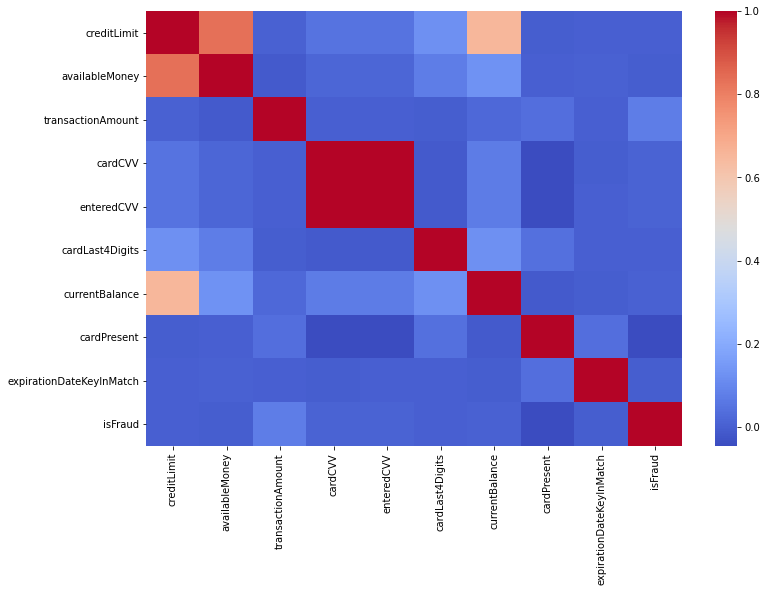

In [13]:
# Drawing a heatmap to visualize the correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


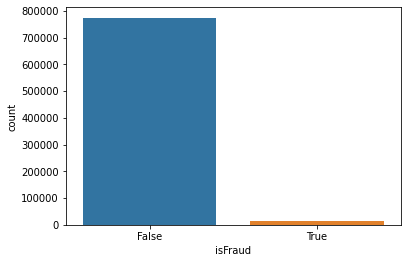

In [14]:
# Distribution of the target

sns.countplot(df['isFraud'])

It looks like the dataset is heavily skewed (imbalanced classes) and some technique needs to be applied, such as oversampling, to balance the distribution before proceeding to modeling

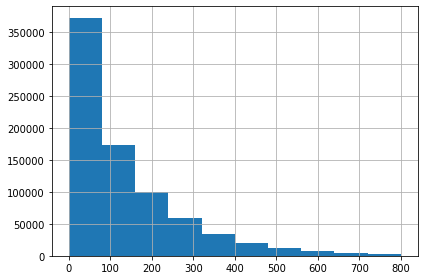

In [15]:
# Transaction amount histogram

transaction_amount = df['transactionAmount']
trans_data = transaction_amount[transaction_amount <= 800]
trans_data.hist(bins=10)
plt.tight_layout()
plt.show()

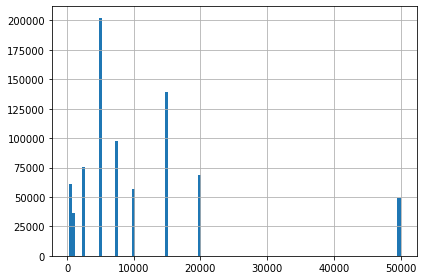

In [16]:
# Credit history histogram

credit_data = df['creditLimit']
credit_data.hist(bins=100)
plt.tight_layout()
plt.show()

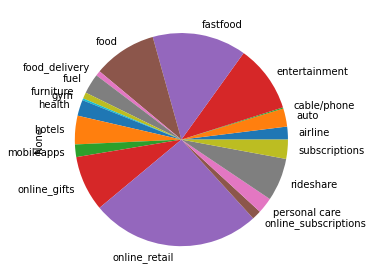

In [17]:
# Merchant Category Code distribution using a pie chart

merch = df.groupby('merchantCategoryCode').size()
merch.plot(kind='pie')
plt.tight_layout()
plt.show()

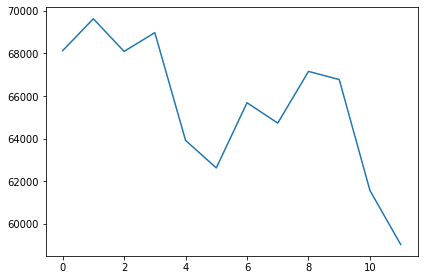

In [18]:
# Distribition

from collections import Counter
transaction_time = df['transactionDateTime']
trans_counter = Counter()
for i in transaction_time.values:
    month = i.split('-')[1]
    trans_counter[month] += 1
trans = pd.DataFrame.from_dict(trans_counter, orient='index').reset_index()
trans.plot(legend=False, xticks=None)
plt.tight_layout()
plt.show()





# Next Step - Data Cleaning

## Some of the columns are objects which need to be converted to pandas datetime data type

In [19]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [20]:
df.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.0,2016-08-13 14:27:32,98.55,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,5000,5000.0,2016-10-11 05:05:54,74.51,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,5000,5000.0,2016-11-08 09:18:39,7.47,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,5000,5000.0,2016-12-10 02:14:50,7.47,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,5000,5000.0,2016-03-24 21:04:46,71.18,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


## Feature Engineering - hypothesis is that there may be a stronger relationship between the target and the columns in year, month format

In [21]:
df['transactionDateTime_year'] = pd.DatetimeIndex(df['transactionDateTime']).year
df['transactionDateTime_month'] = pd.DatetimeIndex(df['transactionDateTime']).month

df['currentExpDate_year'] = pd.DatetimeIndex(df['currentExpDate']).year
df['currentExpDate_month'] = pd.DatetimeIndex(df['currentExpDate']).month

df['accountOpenDate_year'] = pd.DatetimeIndex(df['accountOpenDate']).year
df['accountOpenDate_month'] = pd.DatetimeIndex(df['accountOpenDate']).month

df['dateOfLastAddressChange_year'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).year
df['dateOfLastAddressChange_month'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).month

In [22]:
data_raw = df[['availableMoney', 'currentBalance', 'transactionAmount', 'creditLimit','transactionDateTime_year'
              ,'transactionDateTime_month','currentExpDate_year','currentExpDate_month','accountOpenDate_year'
              ,'accountOpenDate_month','dateOfLastAddressChange_year','dateOfLastAddressChange_month']]

data_raw['cvvMatch'] = df['enteredCVV'] == df['cardCVV']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## One Hot Encoding Categorical Data

In [23]:
new_expirationDateKeyInMatch = pd.get_dummies(df['expirationDateKeyInMatch'], drop_first=True)
new_cardPresent = pd.get_dummies(df['cardPresent'],drop_first=True)
new_posConditionCode = pd.get_dummies(df['posConditionCode'],drop_first=True)
new_posEntryMode = pd.get_dummies(df['posEntryMode'],drop_first=True)
new_transactionType = pd.get_dummies(df['transactionType'],drop_first=True)
new_merchantCategoryCode = pd.get_dummies(df['merchantCategoryCode'],drop_first=True)
new_merchantCountryCode = pd.get_dummies(df['merchantCountryCode'],drop_first=True)
is_fraud = df['isFraud'].apply(int)
data_raw['cvvMatch'] = data_raw['cvvMatch'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
data_raw = pd.concat([data_raw, new_expirationDateKeyInMatch, new_cardPresent, new_posConditionCode,
                          new_merchantCategoryCode,new_merchantCountryCode, new_posEntryMode, new_transactionType, is_fraud], axis=1)

In [25]:
data_raw.head()

,availableMoney,currentBalance,transactionAmount,creditLimit,transactionDateTime_year,transactionDateTime_month,currentExpDate_year,currentExpDate_month,accountOpenDate_year,accountOpenDate_month,dateOfLastAddressChange_year,dateOfLastAddressChange_month,cvvMatch,True,True,01,08,99,auto,cable/phone,entertainment,fastfood,food,food_delivery,fuel,furniture,gym,health,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,CAN,MEX,PR,US,02,05,09,80,90,ADDRESS_VERIFICATION,PURCHASE,REVERSAL,isFraud
0,5000.0,0.0,98.55,5000,2016,8,2023,6,2015,3,2015,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1,5000.0,0.0,74.51,5000,2016,10,2024,2,2015,3,2015,3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,5000.0,0.0,7.47,5000,2016,11,2025,8,2015,3,2015,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,5000.0,0.0,7.47,5000,2016,12,2025,8,2015,3,2015,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,5000.0,0.0,71.18,5000,2016,3,2029,10,2015,8,2015,8,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0


In [26]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   availableMoney                 786363 non-null  float64
 1   currentBalance                 786363 non-null  float64
 2   transactionAmount              786363 non-null  float64
 3   creditLimit                    786363 non-null  int64  
 4   transactionDateTime_year       786363 non-null  int64  
 5   transactionDateTime_month      786363 non-null  int64  
 6   currentExpDate_year            786363 non-null  int64  
 7   currentExpDate_month           786363 non-null  int64  
 8   accountOpenDate_year           786363 non-null  int64  
 9   accountOpenDate_month          786363 non-null  int64  
 10  dateOfLastAddressChange_year   786363 non-null  int64  
 11  dateOfLastAddressChange_month  786363 non-null  int64  
 12  cvvMatch                      

# Train Val Test Split

The dataset is split into training, validation and testing (75:15:10 ratio)

The training subset is used for training Machine Learning models
The validation subset is used for hyperparameter tuning the ML models

The testing subset is evaluated on in the very end to ensure that no bias has been added to the models while tuning using the validation subset (since the tuning we may do for increasing performance would work well on validation subset but may end up decreasing generalization)

In [27]:
X = data_raw.drop('isFraud', axis=1)
y = data_raw['isFraud']

In [28]:
from sklearn.model_selection import train_test_split
import time

In [29]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [30]:
new_df = pd.concat([X_train, y_train],
                   axis=1)
new_df.head()

,availableMoney,currentBalance,transactionAmount,creditLimit,transactionDateTime_year,transactionDateTime_month,currentExpDate_year,currentExpDate_month,accountOpenDate_year,accountOpenDate_month,dateOfLastAddressChange_year,dateOfLastAddressChange_month,cvvMatch,True,True,01,08,99,auto,cable/phone,entertainment,fastfood,food,food_delivery,fuel,furniture,gym,health,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,CAN,MEX,PR,US,02,05,09,80,90,ADDRESS_VERIFICATION,PURCHASE,REVERSAL,isFraud
25426,1907.28,592.72,309.01,2500,2016,8,2028,5,2014,6,2014,6,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
27917,5290.17,9709.83,93.15,15000,2016,3,2030,9,2012,1,2012,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
677714,48311.51,1688.49,124.98,50000,2016,6,2033,2,2015,10,2016,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
357440,250.00,0.00,135.45,250,2016,12,2031,1,2009,7,2016,11,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
57072,1230.17,3769.83,306.82,5000,2016,10,2020,7,2014,10,2016,9,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


##Due to class imbalance, we use oversampling of the minority class (isFraud = True)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


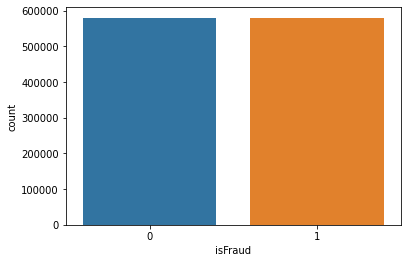

In [31]:
max_size = new_df['isFraud'].value_counts().max()

lst = [new_df]
for class_index, group in new_df.groupby('isFraud'):
    lst.append(group.sample(max_size-len(group), replace=True))
frame_new = pd.concat(lst)
sns.countplot(frame_new['isFraud'])

In [32]:
X_train = frame_new.drop('isFraud', axis=1)
y_train = frame_new['isFraud']

# Logistic Regression

In [33]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

In [34]:
log = LogisticRegression()
start_time = time.time()
log.fit(X_train, y_train)
total_time_training_log = time.time() - start_time
start_time = time.time()
y_pred = log.predict(X_val)
total_time_inference_log = time.time() - start_time

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')

print("Total Time for training a Logistic Regression Classifier is", total_time_training_log)
print("Total Time for inference of a Logistic Regression Classifier is", total_time_inference_log)

acc_logreg = accuracy_score(y_val,y_pred)
recall_logreg = recall_score(y_val,y_pred)
precision_logreg = precision_score(y_val,y_pred)
f1_logreg = f1_score(y_val,y_pred)

Accuracy Score: 0.6781541957034098


Confusion Matrix: 
[[78775 37266]
 [  697  1216]]


Area Under Curve: 0.6572528488711741


Recall score: 0.6356508102456874


Precision score: 0.031599189231328935


f1 score: 0.06020547097413046


Total Time for training a Logistic Regression Classifier is 23.751433849334717
Total Time for inference of a Logistic Regression Classifier is 0.020318984985351562


In [36]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.99      0.68      0.81    116041
    Fraudulent       0.03      0.64      0.06      1913

      accuracy                           0.68    117954
     macro avg       0.51      0.66      0.43    117954
  weighted avg       0.98      0.68      0.79    117954



# SVC (Takes Time to Run)

In [37]:
# svc = SVC()
# start_time = time.time()
# svc.fit(X_train, y_train)
# total_time_training_svc = time.time() - start_time
# start_time = time.time()
# y_pred = svc.predict(X_val)
# total_time_inference_svc = time.time() - start_time
# acc_svc = accuracy_score(y_val, y_pred)
# print(confusion_matrix(y_val, y_pred))
# print("Total Time for training a SVC is", total_time_training_svc)
# print("Total Time for inference of a SVC is", total_time_inference_svc)

In [38]:
# print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
# print(f'Recall score: {recall_score(y_val, y_pred)}')
# print(f'Precision score: {precision_score(y_val, y_pred)}')
# print(f'f1 score: {f1_score(y_val, y_pred)}')

# recall_svc = recall_score(y_val, y_pred)
# precision_svc = precision_score(y_val, y_pred)
# f1_svc = f1_score(y_val, y_pred)


In [39]:
# print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

# XGBoost (Boosting Decision Trees)

In [40]:
start_time = time.time()
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0).fit(X_train, y_train)
total_time_training_xgb = time.time() - start_time
start_time = time.time()
y_val = clf.predict(X_val)
total_time_inference_xgb = time.time() - start_time

In [41]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')

print("Total Time for training a XGBoost is", total_time_training_xgb)
print("Total Time for inference of a XGBoost is", total_time_inference_xgb)

acc_xgb = accuracy_score(y_val, y_pred)
recall_xgb = recall_score(y_val, y_pred)
precision_xgb = precision_score(y_val, y_pred)
f1_xgb = f1_score(y_val, y_pred)

Accuracy Score: 0.8010834732183733


Confusion Matrix: 
[[70459 14450]
 [ 9013 24032]]


Area Under Curve: 0.7785342618305089


Recall score: 0.7272507187169012


Precision score: 0.6244997661244218


f1 score: 0.6719700253051295


Total Time for training a XGBoost is 264.72651624679565
Total Time for inference of a XGBoost is 0.2106461524963379


In [42]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.89      0.83      0.86     84909
    Fraudulent       0.62      0.73      0.67     33045

      accuracy                           0.80    117954
     macro avg       0.76      0.78      0.76    117954
  weighted avg       0.81      0.80      0.81    117954



# Decision Tree

In [43]:
tree = DecisionTreeClassifier()
start_time = time.time()
tree.fit(X_train, y_train)
total_time_training_tree = time.time() - start_time
start_time = time.time()
y_pred = tree.predict(X_val)
total_time_inference_tree = time.time() - start_time

In [44]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')


print("Total Time for training a Decision Tree is", total_time_training_tree)
print("Total Time for inference of a Decision Tree is", total_time_inference_tree)

acc_tree = accuracy_score(y_val, y_pred)
recall_tree = recall_score(y_val, y_pred)
precision_tree = precision_score(y_val, y_pred)
f1_tree = f1_score(y_val, y_pred)

Accuracy Score: 0.7245451616731946


Confusion Matrix: 
[[84257   652]
 [31839  1206]]


Area Under Curve: 0.5144084393103194


Recall score: 0.03649568769859283


Precision score: 0.6490850376749193


f1 score: 0.06910580752370857


Total Time for training a Decision Tree is 23.550332069396973
Total Time for inference of a Decision Tree is 0.05797457695007324


In [45]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.73      0.99      0.84     84909
    Fraudulent       0.65      0.04      0.07     33045

      accuracy                           0.72    117954
     macro avg       0.69      0.51      0.45    117954
  weighted avg       0.70      0.72      0.62    117954



# Random Forest 

In [46]:
rfc = RandomForestClassifier(n_estimators=75)
start_time = time.time()
rfc.fit(X_train, y_train)
total_time_training_rfc = time.time() - start_time
start_time = time.time()
y_pred = rfc.predict(X_val)
total_time_inference_rfc = time.time() - start_time

In [47]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')

print("Total Time for training a Random Forest Classifier is", total_time_training_rfc)
print("Total Time for inference of a Random Forest Classifier is", total_time_inference_rfc)

acc_rfc = accuracy_score(y_val, y_pred)
recall_rfc = recall_score(y_val, y_pred)
precision_rfc = precision_score(y_val, y_pred)
f1_rfc = f1_score(y_val, y_pred)

Accuracy Score: 0.7202892653068145


Confusion Matrix: 
[[84902     7]
 [32986    59]]


Area Under Curve: 0.5008515014448167


Recall score: 0.0017854440913905281


Precision score: 0.8939393939393939


f1 score: 0.003563770348222645


Total Time for training a Random Forest Classifier is 220.79191994667053
Total Time for inference of a Random Forest Classifier is 2.915893077850342


In [48]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.72      1.00      0.84     84909
    Fraudulent       0.89      0.00      0.00     33045

      accuracy                           0.72    117954
     macro avg       0.81      0.50      0.42    117954
  weighted avg       0.77      0.72      0.60    117954



# Bagging Decision Tree

In [49]:
kfold = sklearn.model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
start_time = time.time()
model.fit(X_train, y_train)
total_time_training_bc = time.time() - start_time
start_time = time.time()
y_pred = model.predict(X_val)
total_time_inference_bc = time.time() - start_time

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [50]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')

print("Total Time for training a Bagging Decision Tree is", total_time_training_bc)
print("Total Time for inference of a Bagging Decision Tree is", total_time_inference_bc)

acc_bc = accuracy_score(y_val, y_pred)
recall_bc = recall_score(y_val, y_pred)
precision_bc = precision_score(y_val, y_pred)
f1_bc = f1_score(y_val, y_pred)


Accuracy Score: 0.7209929294470726


Confusion Matrix: 
[[84859    50]
 [32860   185]]


Area Under Curve: 0.5025047803307108


Recall score: 0.005598426388258435


Precision score: 0.7872340425531915


f1 score: 0.01111778846153846


Total Time for training a Bagging Decision Tree is 1268.3622832298279
Total Time for inference of a Bagging Decision Tree is 5.144152402877808


In [51]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.72      1.00      0.84     84909
    Fraudulent       0.79      0.01      0.01     33045

      accuracy                           0.72    117954
     macro avg       0.75      0.50      0.42    117954
  weighted avg       0.74      0.72      0.61    117954



# Naive Bayes

In [52]:
clf = GaussianNB()
start_time = time.time()
clf = clf.fit(X_train, y_train)
total_time_training_nb = time.time() - start_time
start_time = time.time()
y_pred = clf.predict(X_val)
total_time_inference_nb = time.time() - start_time

In [53]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')

print("Total Time for training a Naive Bayes Classifier is", total_time_training_nb)
print("Total Time for inference of a Naive Bayes Classifier is", total_time_inference_nb)


acc_nb = accuracy_score(y_val, y_pred)
recall_nb = recall_score(y_val, y_pred)
precision_nb = precision_score(y_val, y_pred)
f1_nb = f1_score(y_val, y_pred)


Accuracy Score: 0.7538786306526273


Confusion Matrix: 
[[61096 23813]
 [ 5218 27827]]


Area Under Curve: 0.7808204615117389


Recall score: 0.8420941140868513


Precision score: 0.5388652207591015


f1 score: 0.6571884040857294


Total Time for training a Naive Bayes Classifier is 0.8318507671356201
Total Time for inference of a Naive Bayes Classifier is 0.07086348533630371


In [54]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.92      0.72      0.81     84909
    Fraudulent       0.54      0.84      0.66     33045

      accuracy                           0.75    117954
     macro avg       0.73      0.78      0.73    117954
  weighted avg       0.81      0.75      0.77    117954



# K-Nearest Neighbors

In [55]:
knn = KNeighborsClassifier(n_neighbors=2)
start_time = time.time()
knn.fit(X_train, y_train)
total_time_training_knn = time.time() - start_time
start_time = time.time()
y_pred = knn.predict(X_val)
total_time_inference_knn = time.time() - start_time

In [56]:
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')

print("Total Time for training a KNN is", total_time_training_knn)
print("Total Time for inference of a KNN is", total_time_inference_knn)

acc_knn = accuracy_score(y_val, y_pred)
recall_knn = recall_score(y_val, y_pred)
precision_knn = precision_score(y_val, y_pred)
f1_knn = f1_score(y_val, y_pred)

Accuracy Score: 0.7174661308645743


Confusion Matrix: 
[[83851  1058]
 [32268   777]]


Area Under Curve: 0.5055264960254077


Recall score: 0.02351339083068543


Precision score: 0.42343324250681197


f1 score: 0.04455275229357798


Total Time for training a KNN is 90.53871321678162
Total Time for inference of a KNN is 10.353709697723389


In [57]:
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Not Fraudulent       0.72      0.99      0.83     84909
    Fraudulent       0.42      0.02      0.04     33045

      accuracy                           0.72    117954
     macro avg       0.57      0.51      0.44    117954
  weighted avg       0.64      0.72      0.61    117954



##Elbow Method


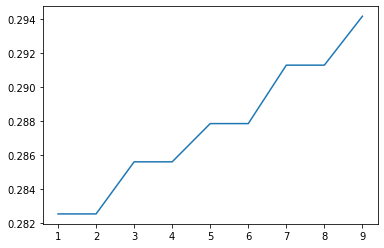

In [58]:
error_rate = []
range_knn = range(1,10)
for i in range_knn:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))
plt.plot(range_knn, error_rate)

# Deep Learning

In [59]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [60]:
y_train = np.reshape(y_train.values, (len(y_train), 1))

In [61]:
model = Sequential()
model.add(Dense(64, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [63]:
number_of_iterations = 20
batch_size = 512
start_time = time.time()
model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=2, validation_data=(X_val, y_val))
total_time_training_dl = time.time() - start_time

Epoch 1/20
2268/2268 - 18s - loss: 4.1259 - accuracy: 0.5593 - val_loss: 2.3762 - val_accuracy: 0.4328
Epoch 2/20
2268/2268 - 5s - loss: 1.2704 - accuracy: 0.5880 - val_loss: 1.9278 - val_accuracy: 0.4151
Epoch 3/20
2268/2268 - 5s - loss: 1.0626 - accuracy: 0.6032 - val_loss: 0.6437 - val_accuracy: 0.7042
Epoch 4/20
2268/2268 - 5s - loss: 0.9229 - accuracy: 0.6159 - val_loss: 0.5939 - val_accuracy: 0.7650
Epoch 5/20
2268/2268 - 5s - loss: 0.8805 - accuracy: 0.6231 - val_loss: 0.6545 - val_accuracy: 0.6964
Epoch 6/20
2268/2268 - 5s - loss: 0.8598 - accuracy: 0.6268 - val_loss: 0.4552 - val_accuracy: 0.7954
Epoch 7/20
2268/2268 - 5s - loss: 0.8337 - accuracy: 0.6299 - val_loss: 1.4791 - val_accuracy: 0.4195
Epoch 8/20
2268/2268 - 4s - loss: 0.8212 - accuracy: 0.6334 - val_loss: 0.5599 - val_accuracy: 0.7808
Epoch 9/20
2268/2268 - 4s - loss: 0.8466 - accuracy: 0.6308 - val_loss: 0.5042 - val_accuracy: 0.7592
Epoch 10/20
2268/2268 - 4s - loss: 0.8255 - accuracy: 0.6344 - val_loss: 0.8351 -

In [64]:
start_time = time.time()
y_pred_value = model.predict(X_val)
total_time_inference_dl = time.time() - start_time
y_pred = [0 if each > 0.5 else 1 for each in y_pred_value]
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_val, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_val, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_val, y_pred)}')
print('\n')
print(classification_report(y_val, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))
print('\n')

print("Total Time for training a Deep learning model is", total_time_training_dl)
print("Total Time for inference of a Deep learning model is", total_time_inference_dl)

acc_dl = accuracy_score(y_val, y_pred)
recall_dl = recall_score(y_val, y_pred)
precision_dl = precision_score(y_val, y_pred)
f1_dl = f1_score(y_val, y_pred)

Accuracy Score: 0.29324991098224734


Confusion Matrix: 
[[29564 55345]
 [28019  5026]]


Area Under Curve: 0.25014007706961294


Recall score: 0.1520956271750643


Precision score: 0.08325189246492522


f1 score: 0.10760469298621221


                precision    recall  f1-score   support

Not Fraudulent       0.51      0.35      0.41     84909
    Fraudulent       0.08      0.15      0.11     33045

      accuracy                           0.29    117954
     macro avg       0.30      0.25      0.26    117954
  weighted avg       0.39      0.29      0.33    117954



Total Time for training a Deep learning model is 106.1326162815094
Total Time for inference of a Deep learning model is 3.0414979457855225


# Results

In [65]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'XGBoost', 'Decision Trees', 'Random Forest Classifier', 
              'Bagging Decision Tree','Naive Bayes','KNN','Deep learning'],
    'Accuracy': [acc_logreg, 
              acc_xgb, acc_tree, acc_rfc, 
              acc_bc, acc_nb, acc_knn, acc_dl],
    'Recall': [recall_logreg, 
    recall_xgb, recall_tree, recall_rfc, 
    recall_bc, recall_nb, recall_knn, recall_dl],
    'Precision': [precision_logreg, 
    precision_xgb, precision_tree, precision_rfc, 
    precision_bc, precision_nb, precision_knn, precision_dl],
    'F1': [f1_logreg, 
     f1_xgb, f1_tree, f1_rfc, 
     f1_bc, f1_nb, f1_knn, f1_dl],
     'Training Time': [total_time_training_log, 
      total_time_training_xgb, total_time_training_tree, total_time_training_rfc, 
      total_time_training_bc, total_time_training_nb, total_time_training_knn, total_time_training_dl],
      'Inference Time': [total_time_inference_log, 
      total_time_inference_xgb, total_time_inference_tree, total_time_inference_rfc, 
      total_time_inference_bc, total_time_inference_nb, total_time_inference_knn, total_time_inference_dl]})
models.sort_values(by='Recall', ascending=False)

,Model,Accuracy,Recall,Precision,F1,Training Time,Inference Time
5,Naive Bayes,0.753879,0.842094,0.538865,0.657188,0.831851,0.070863
1,XGBoost,0.801083,0.727251,0.624500,0.671970,264.726516,0.210646
0,Logistic Regression,0.678154,0.635651,0.031599,0.060205,23.751434,0.020319
7,Deep learning,0.293250,0.152096,0.083252,0.107605,106.132616,3.041498
2,Decision Trees,0.724545,0.036496,0.649085,0.069106,23.550332,0.057975
6,KNN,0.717466,0.023513,0.423433,0.044553,90.538713,10.353710
4,Bagging Decision Tree,0.720993,0.005598,0.787234,0.011118,1268.362283,5.144152
3,Random Forest Classifier,0.720289,0.001785,0.893939,0.003564,220.791920,2.915893
